In [ ]:
!pip install --upgrade nltk


In [ ]:
!pip uninstall -y nltk
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:00


In [ ]:
pip install pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 89.0 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF library


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/Raw/Laws/Consolidated_PDFs"

# List all files in the directory
files = os.listdir(pdf_dir)

# Count the number of PDFs
pdf_count = len([file for file in files if file.endswith('.pdf')])

print(f"Total number of PDF files: {pdf_count}")

Total number of PDF files: 2994


In [ ]:
import os
import re
import string
import fitz  # PyMuPDF for PDF handling

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/Raw/Laws/Consolidated_PDFs"

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    with fitz.open(pdf_path) as pdf:
        text = ""
        for page in pdf:
            text += page.get_text()
    return text

# Preprocessing functions
def clean_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    return text

def tokenize(text):
    # Split text into words based on whitespace
    return text.split()

def remove_stopwords_and_pronouns(tokens):
    # Define stopwords and pronouns
    stop_words = set([
        'a', 'an', 'the', 'and', 'or', 'but', 'if', 'in', 'on', 'with', 'as', 'at', 'by', 'for', 'to', 'of', 'is', 'are',
        'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'this', 'that', 'these', 'those',
        'he', 'she', 'it', 'they', 'we', 'i', 'you', 'me', 'him', 'her', 'us', 'them', 'mine', 'ours'
    ])
    return [token for token in tokens if token.lower() not in stop_words]

# Descriptive analysis functions
def analyze_text(tokens, raw_text):
    word_lengths = [len(word) for word in tokens]
    sentences = re.split(r'[.!?]', raw_text)  # Split text into sentences based on punctuation
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip()]  # Non-empty sentences
    return {
        'word_count': len(tokens),
        'sentence_count': len(sentence_lengths),
        'total_word_length': sum(word_lengths),
        'total_sentence_length': sum(sentence_lengths)
    }

# Initialize combined counts
total_word_count = 0
total_sentence_count = 0
total_word_length = 0
total_sentence_length = 0

# Process all PDFs in the directory
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        print(f"Processing {filename}...")

        # Step 1: Extract text
        raw_text = extract_text_from_pdf(file_path)

        # Step 2: Clean text
        cleaned_text = clean_text(raw_text)

        # Step 3: Tokenize and preprocess text
        tokens = tokenize(cleaned_text)
        tokens = remove_stopwords_and_pronouns(tokens)

        # Step 4: Analyze text
        analysis = analyze_text(tokens, raw_text)

        # Add to totals
        total_word_count += analysis['word_count']
        total_sentence_count += analysis['sentence_count']
        total_word_length += analysis['total_word_length']
        total_sentence_length += analysis['total_sentence_length']

        # Display individual file results
        print(f"Analysis for {filename}:")
        print(f"Word Count: {analysis['word_count']}")
        print(f"Sentence Count: {analysis['sentence_count']}")
        print("-" * 50)

# Compute combined averages
average_word_length = total_word_length / total_word_count if total_word_count else 0
average_sentence_length = total_sentence_length / total_sentence_count if total_sentence_count else 0

# Display combined results
print("Combined Analysis for All PDFs:")
print(f"Total Word Count: {total_word_count}")
print(f"Total Sentence Count: {total_sentence_count}")
print(f"Average Word Length: {average_word_length:.2f}")
print(f"Average Sentence Length: {average_sentence_length:.2f}")


Processing USCODE-2023-title29-chap25.pdf...


97.85s - Could not connect to 127.0.0.1: 50859
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 493, in start_client
    s.connect((host, port))
ConnectionRefusedError: [Errno 111] Connection refused
Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise_exception("{0}() failed:", func.__name__, level="info")


Streaming output truncated to the last 5000 lines.
Processing USCODE-2023-title29-chap23.pdf...
Analysis for USCODE-2023-title29-chap23.pdf:
Word Count: 2909
Sentence Count: 509
--------------------------------------------------
Processing USCODE-2023-title29-chap23_1.pdf...
Analysis for USCODE-2023-title29-chap23_1.pdf:
Word Count: 2909
Sentence Count: 509
--------------------------------------------------
Processing USCODE-2023-title29-chap24_1.pdf...
Analysis for USCODE-2023-title29-chap24_1.pdf:
Word Count: 1216
Sentence Count: 492
--------------------------------------------------
Processing USCODE-2023-title29-chap24.pdf...
Analysis for USCODE-2023-title29-chap24.pdf:
Word Count: 1216
Sentence Count: 492
--------------------------------------------------
Processing USCODE-2023-title29-chap25_1.pdf...
Analysis for USCODE-2023-title29-chap25_1.pdf:
Word Count: 589
Sentence Count: 218
--------------------------------------------------
Processing USCODE-2023-title1-chap3_1.pdf...
Ana

In [ ]:
import os
import re
import fitz  # PyMuPDF for PDF handling
from collections import Counter

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/Raw/Laws/Consolidated_PDFs"

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    with fitz.open(pdf_path) as pdf:
        text = ""
        for page in pdf:
            text += page.get_text()
    return text

# Function to count special characters
def count_special_characters(text):
    special_characters = re.findall(r'[^\w\s]', text)
    return Counter(special_characters)

# Initialize totals
total_special_chars = Counter()
total_chars = 0
file_results = []

# Process each PDF
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        print(f"Processing {filename}...")

        # Extract text
        raw_text = extract_text_from_pdf(file_path)

        # Total characters in the file
        file_char_count = len(raw_text)
        total_chars += file_char_count

        # Count special characters
        special_char_counts = count_special_characters(raw_text)
        total_special_chars.update(special_char_counts)

        # Calculate percentage of special characters
        total_special_count = sum(special_char_counts.values())
        special_char_percentage = (total_special_count / file_char_count) * 100 if file_char_count > 0 else 0

        # Save results for this file
        file_results.append({
            'filename': filename,
            'total_characters': file_char_count,
            'special_characters': total_special_count,
            'special_char_percentage': special_char_percentage
        })

        print(f"  Total Characters: {file_char_count}")
        print(f"  Special Characters: {total_special_count} ({special_char_percentage:.2f}%)")
        print("-" * 50)

# Display summary of all files
print("Summary of Special Character Analysis:")
print(f"  Total Characters Across All PDFs: {total_chars}")
print(f"  Total Special Characters Across All PDFs: {sum(total_special_chars.values())}")
print(f"  Overall Percentage of Special Characters: {(sum(total_special_chars.values()) / total_chars) * 100:.2f}%")

# Optional: Display results for each file in a tabular format
import pandas as pd
results_df = pd.DataFrame(file_results)
print(results_df)



Streaming output truncated to the last 5000 lines.
--------------------------------------------------
Processing USCODE-2023-title22-chap101.pdf...
  Total Characters: 50664
  Special Characters: 2839 (5.60%)
--------------------------------------------------
Processing USCODE-2023-title22-chap102_1.pdf...
  Total Characters: 175476
  Special Characters: 8648 (4.93%)
--------------------------------------------------
Processing USCODE-2023-title22-chap102.pdf...
  Total Characters: 175476
  Special Characters: 8648 (4.93%)
--------------------------------------------------
Processing USCODE-2023-title22-chap103.pdf...
  Total Characters: 120038
  Special Characters: 5613 (4.68%)
--------------------------------------------------
Processing USCODE-2023-title22-chap103_1.pdf...
  Total Characters: 120038
  Special Characters: 5613 (4.68%)
--------------------------------------------------
Processing USCODE-2023-title22-chap104.pdf...
  Total Characters: 51601
  Special Characters: 2549 (

In [ ]:
pip install pymupdf


In [ ]:
pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00


Combined Sentence Length Analysis:
  Average Sentence Length: 13.40 words
  Maximum Sentence Length: 3525 words
  Minimum Sentence Length: 1 words


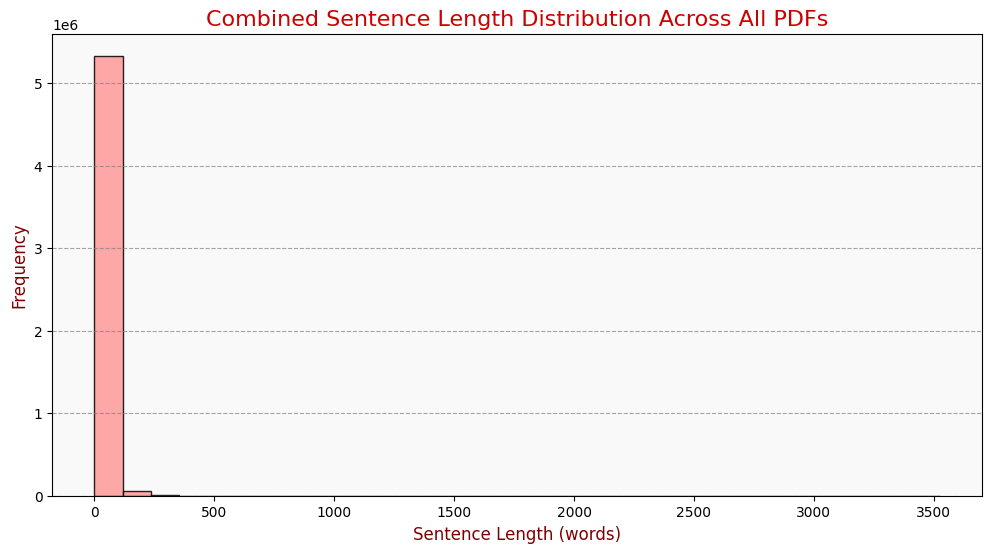

In [ ]:
import re
import matplotlib.pyplot as plt

# Initialize aggregate variables
all_sentence_lengths = []

# Function to calculate sentence lengths
def calculate_sentence_lengths(text):
    sentences = re.split(r'[.!?]', text)  # Split by sentence-ending punctuation
    return [len(sentence.split()) for sentence in sentences if len(sentence.strip()) > 0]

# Aggregate sentence lengths for all PDFs
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        raw_text = extract_text_from_pdf(file_path)

        # Append sentence lengths to the aggregate list
        all_sentence_lengths.extend(calculate_sentence_lengths(raw_text))

# Summary statistics for sentence lengths
avg_sentence_length = sum(all_sentence_lengths) / len(all_sentence_lengths) if all_sentence_lengths else 0
max_sentence_length = max(all_sentence_lengths) if all_sentence_lengths else 0
min_sentence_length = min(all_sentence_lengths) if all_sentence_lengths else 0

print("Combined Sentence Length Analysis:")
print(f"  Average Sentence Length: {avg_sentence_length:.2f} words")
print(f"  Maximum Sentence Length: {max_sentence_length} words")
print(f"  Minimum Sentence Length: {min_sentence_length} words")

# Plot histogram for combined sentence lengths with a custom color
plt.figure(figsize=(12, 6))
plt.hist(all_sentence_lengths, bins=30, color='#ff9999', edgecolor='black', alpha=0.85)  # Soft red bars
plt.title("Combined Sentence Length Distribution Across All PDFs", fontsize=16, color='#cc0000')  # Dark red title
plt.xlabel("Sentence Length (words)", fontsize=12, color='#800000')  # Maroon label
plt.ylabel("Frequency", fontsize=12, color='#800000')  # Maroon label
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')  # Gray gridlines
plt.gca().set_facecolor('#f9f9f9')  # Light gray background
plt.show()


compiling data together



In [ ]:
import os
import shutil

# Source directories
source_dirs = [
    "/content/drive/Shareddrives/DATA298B_Final/Data/Raw/Laws/Consolidated_PDFs",
    "/content/drive/Shareddrives/DATA298B_Final/Data/Raw/Company_policies",
    "/content/drive/Shareddrives/DATA298B_Final/Data/Raw/Legal_cases"
]

# Target directory
target_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Copy PDFs from source directories to the target directory
for source_dir in source_dirs:
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith(".pdf"):
                source_file = os.path.join(root, file)
                target_file = os.path.join(target_dir, file)
                try:
                    shutil.copy(source_file, target_file)
                    print(f"Copied: {source_file} -> {target_file}")
                except Exception as e:
                    print(f"Error copying {source_file}: {e}")

print(f"All PDFs have been consolidated into {target_dir}.")


Streaming output truncated to the last 5000 lines.
Copied: /content/drive/Shareddrives/DATA298B_Final/Data/Raw/Company_policies/southindianbank.com.pdf -> /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/southindianbank.com.pdf
Copied: /content/drive/Shareddrives/DATA298B_Final/Data/Raw/Company_policies/soulmate2date.com.pdf -> /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/soulmate2date.com.pdf
Copied: /content/drive/Shareddrives/DATA298B_Final/Data/Raw/Company_policies/southuniversity.edu.pdf -> /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/southuniversity.edu.pdf
Copied: /content/drive/Shareddrives/DATA298B_Final/Data/Raw/Company_policies/soufeel.com.pdf -> /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/soufeel.com.pdf
Copied: /content/drive/Shareddrives/DATA298B_Final/Data/Raw/Company_policies/soundfeelings.com.pdf -> /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/sound

In [ ]:
import os

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# List all files in the directory
files = os.listdir(pdf_dir)

# Count the number of PDFs
pdf_count = len([file for file in files if file.endswith('.pdf')])

print(f"Total number of PDF files: {pdf_count}")

Total number of PDF files: 10236


stats for all PDFs


In [ ]:
import os
import re
import fitz  # PyMuPDF for PDF handling
from collections import Counter
import pandas as pd

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    try:
        with fitz.open(pdf_path) as pdf:
            if pdf.page_count == 0:  # Check for empty PDFs
                print(f"Skipping empty file: {pdf_path}")
                return ""
            text = ""
            for page in pdf:
                text += page.get_text()
            return text
    except Exception as e:
        print(f"Error processing file {pdf_path}: {e}")
        return ""  # Skip problematic files

# Function to count special characters
def count_special_characters(text):
    special_characters = re.findall(r'[^\w\s]', text)
    return Counter(special_characters)

# Initialize totals
total_special_chars = Counter()
total_chars = 0
file_results = []

# Process each PDF
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        print(f"Processing {filename}...")

        # Extract text
        raw_text = extract_text_from_pdf(file_path)

        # Skip empty or problematic files
        if not raw_text.strip():
            continue

        # Total characters in the file
        file_char_count = len(raw_text)
        total_chars += file_char_count

        # Count special characters
        special_char_counts = count_special_characters(raw_text)
        total_special_chars.update(special_char_counts)

        # Calculate percentage of special characters
        total_special_count = sum(special_char_counts.values())
        special_char_percentage = (total_special_count / file_char_count) * 100 if file_char_count > 0 else 0

        # Save results for this file
        file_results.append({
            'filename': filename,
            'total_characters': file_char_count,
            'special_characters': total_special_count,
            'special_char_percentage': special_char_percentage
        })

        print(f"  Total Characters: {file_char_count}")
        print(f"  Special Characters: {total_special_count} ({special_char_percentage:.2f}%)")
        print("-" * 50)

# Display summary of all files
print("\nSummary of Special Character Analysis:")
print(f"  Total Characters Across All PDFs: {total_chars}")
print(f"  Total Special Characters Across All PDFs: {sum(total_special_chars.values())}")
print(f"  Overall Percentage of Special Characters: {(sum(total_special_chars.values()) / total_chars) * 100:.2f}%")

# Create a DataFrame and display results
results_df = pd.DataFrame(file_results)
print("\nResults:")
print(results_df)

Streaming output truncated to the last 5000 lines.
  Special Characters: 20584 (6.35%)
--------------------------------------------------
Processing USCODE-2023-title7-chap38_1.pdf...
  Total Characters: 324156
  Special Characters: 20584 (6.35%)
--------------------------------------------------
Processing USCODE-2023-title7-chap39_1.pdf...
  Total Characters: 17714
  Special Characters: 835 (4.71%)
--------------------------------------------------
Processing USCODE-2023-title7-chap39.pdf...
  Total Characters: 17714
  Special Characters: 835 (4.71%)
--------------------------------------------------
Processing USCODE-2023-title7-chap40.pdf...
  Total Characters: 11265
  Special Characters: 640 (5.68%)
--------------------------------------------------
Processing USCODE-2023-title7-chap40_1.pdf...
  Total Characters: 11265
  Special Characters: 640 (5.68%)
--------------------------------------------------
Processing USCODE-2023-title42-chap2.pdf...
  Total Characters: 32906
  Specia

Processing PDFs:  65%|██████▌   | 6697/10236 [12:18<01:11, 49.32it/s]

Error processing file /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/schedulestar.com.pdf: Cannot open empty file: filename='/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/schedulestar.com.pdf'.


Processing PDFs: 100%|██████████| 10236/10236 [23:09<00:00,  7.36it/s]



Sentence Length Statistics: {'Mean': 13.645318236437046, 'Median': 4, 'Max': 9279, 'Min': 1}
Word Length Statistics: {'Mean': 5.009797553629278, 'Median': 4, 'Max': 102, 'Min': 1}

Most Common Special Characters:
,: 8344057
.: 7481194
): 3815570
(: 3812925
-: 2787983
:: 2210465
‘: 1374482
’: 1163978
–: 986146
§: 851951

POS Tagging Results:
Nouns: 9967565
Verbs: 16205224
Adjectives: 3252280


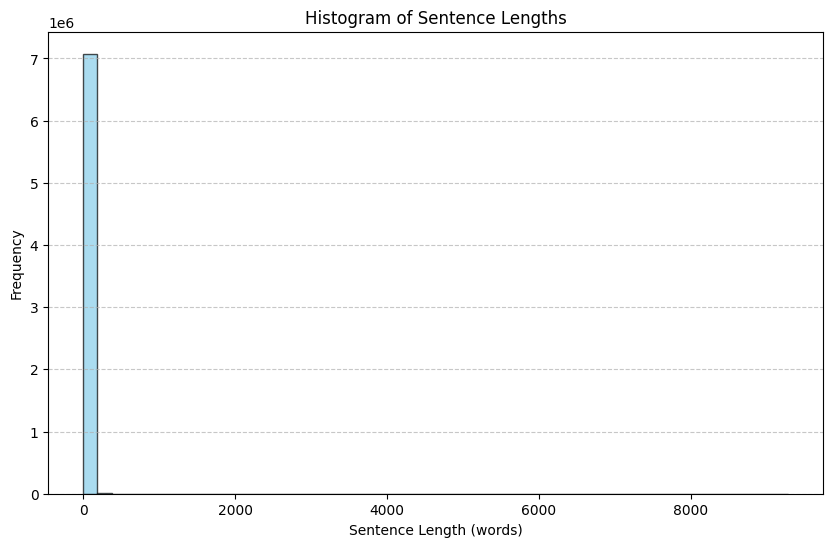

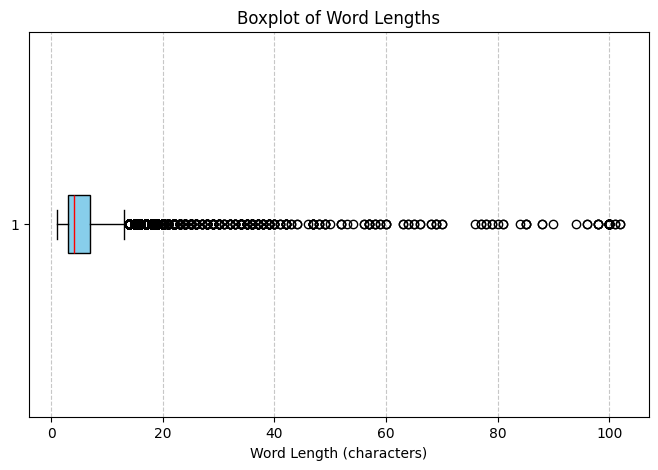

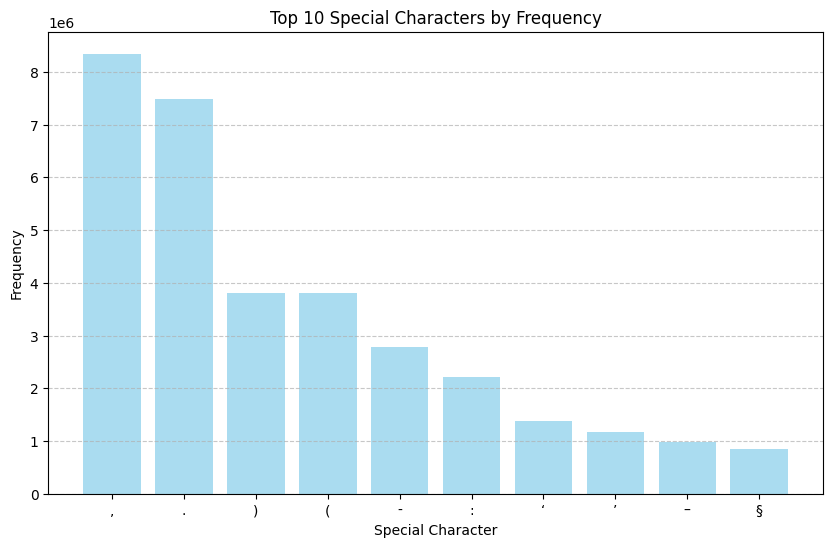

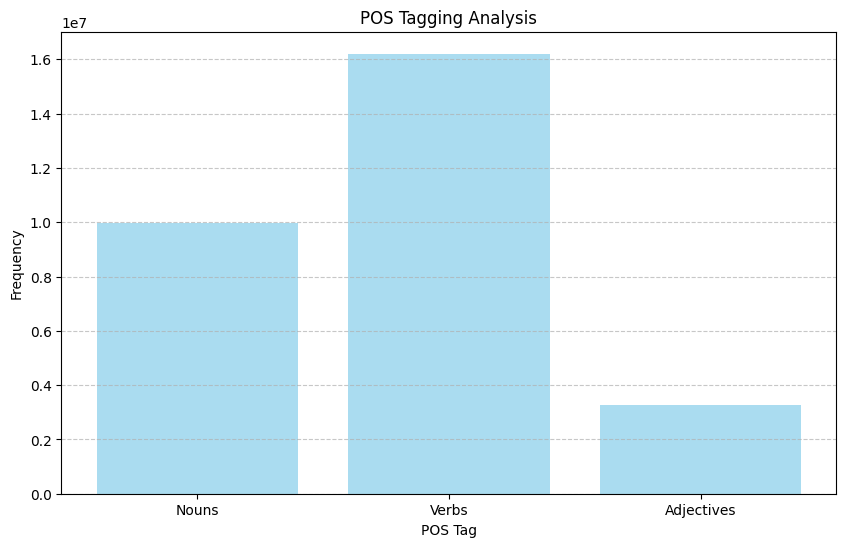

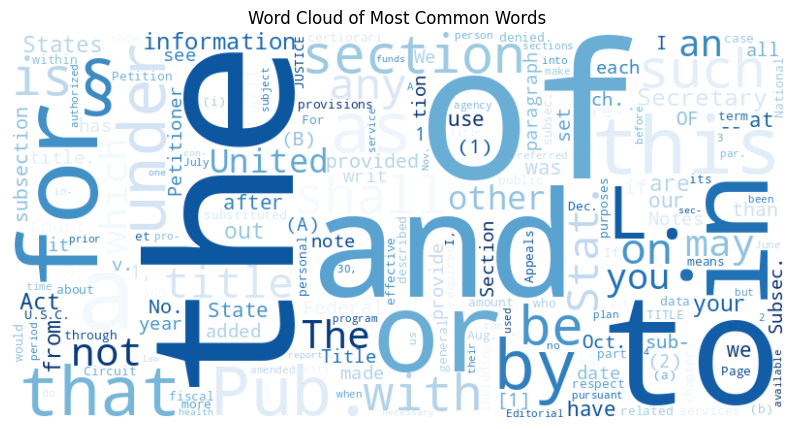

In [ ]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from tqdm import tqdm

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# Initialize placeholders for results
sentence_lengths = []
word_lengths = []
special_character_counts = Counter()
word_frequencies = Counter()
pos_tag_counts = Counter()
empty_files = []

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    try:
        import fitz  # PyMuPDF
        with fitz.open(pdf_path) as pdf:
            if pdf.page_count == 0:
                print(f"Skipping empty file: {pdf_path}")
                empty_files.append(pdf_path)
                return ""
            text = ""
            for page in pdf:
                text += page.get_text()
            return text
    except Exception as e:
        print(f"Error processing file {pdf_path}: {e}")
        empty_files.append(pdf_path)
        return ""

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text.strip())  # Normalize whitespace
    return text

# Function for simple POS tagging using suffix rules
def pos_tagging_analysis(text):
    # Simplified POS tagging using word endings
    pos_tags = {
        "Nouns": len(re.findall(r'\b\w+(tion|ness|ment|ity|ship|age|er|or|ist|ism|ion)\b', text, re.IGNORECASE)),
        "Verbs": len(re.findall(r'\b\w+(ing|ed|en|es|s)\b', text, re.IGNORECASE)),
        "Adjectives": len(re.findall(r'\b\w+(ous|ful|able|ible|al|ive|less|ic|ical)\b', text, re.IGNORECASE)),
    }
    return pos_tags

# Sentence length analysis
def analyze_sentences(text):
    sentences = re.split(r'[.!?]', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

# Word length analysis
def analyze_words(text):
    words = text.split()
    return [len(word) for word in words if word.isalpha()]

# Special character count
def count_special_characters(text):
    return Counter(re.findall(r'[^\w\s]', text))

# Process PDFs
for filename in tqdm(os.listdir(pdf_dir), desc="Processing PDFs"):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        raw_text = extract_text_from_pdf(file_path)

        if raw_text.strip():  # Skip empty or problematic files
            preprocessed_text = preprocess_text(raw_text)

            # Sentence Length Analysis
            sentence_lengths.extend(analyze_sentences(preprocessed_text))

            # Word Length Analysis
            word_lengths.extend(analyze_words(preprocessed_text))

            # Special Character Counts
            special_character_counts.update(count_special_characters(preprocessed_text))

            # Word Frequency Analysis
            word_frequencies.update(preprocessed_text.split())

            # POS Tagging Analysis
            pos_tags = pos_tagging_analysis(preprocessed_text)
            for tag, count in pos_tags.items():
                pos_tag_counts[tag] += count

# Generate descriptive statistics
def generate_statistics(data):
    return {
        "Mean": sum(data) / len(data) if data else 0,
        "Median": sorted(data)[len(data) // 2] if data else 0,
        "Max": max(data) if data else 0,
        "Min": min(data) if data else 0
    }

sentence_stats = generate_statistics(sentence_lengths)
word_stats = generate_statistics(word_lengths)

# Display statistics
print("\nSentence Length Statistics:", sentence_stats)
print("Word Length Statistics:", word_stats)

print("\nMost Common Special Characters:")
for char, count in special_character_counts.most_common(10):
    print(f"{char}: {count}")

print("\nPOS Tagging Results:")
for tag, count in pos_tag_counts.items():
    print(f"{tag}: {count}")

# Visualizations
# 1. Histogram of Sentence Lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Sentence Lengths")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Boxplot of Word Lengths
plt.figure(figsize=(8, 5))
plt.boxplot(word_lengths, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title("Boxplot of Word Lengths")
plt.xlabel("Word Length (characters)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Special Character Frequency
plt.figure(figsize=(10, 6))
special_char_df = pd.DataFrame(special_character_counts.most_common(10), columns=["Character", "Frequency"])
plt.bar(special_char_df["Character"], special_char_df["Frequency"], color='skyblue', alpha=0.7)
plt.title("Top 10 Special Characters by Frequency")
plt.xlabel("Special Character")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. POS Tagging Bar Chart
pos_tags_df = pd.DataFrame(pos_tag_counts.items(), columns=["POS Tag", "Frequency"])
plt.figure(figsize=(10, 6))
plt.bar(pos_tags_df["POS Tag"], pos_tags_df["Frequency"], color='skyblue', alpha=0.7)
plt.title("POS Tagging Analysis")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Word Cloud of Word Frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words")
plt.show()



data prep

In [ ]:
import os
import re
from collections import Counter

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    import fitz  # PyMuPDF
    with fitz.open(pdf_path) as pdf:
        text = ""
        for page in pdf:
            text += page.get_text()
    return text

In [ ]:
import os
import re
from collections import Counter

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    import fitz  # PyMuPDF
    try:
        with fitz.open(pdf_path) as pdf:
            text = ""
            for page in pdf:
                text += page.get_text()
            return text
    except Exception as e:
        # Handle the error for empty or invalid files
        print(f"Error processing file {pdf_path}: {e}")
        return ""  # Return an empty string for problematic files

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# Function to count elements in the raw text
def count_raw_data(text):
    counts = {
        "Special Characters Count": len(re.findall(r'[^\w\s]', text)),
        "URLs Count": len(re.findall(r'https?://[^\s]+', text)),
        "HTML Links Count": len(re.findall(r'<a\s+href="[^"]+">[^<]+</a>', text)),
        "Punctuation Marks Count": len(re.findall(r'[.,;!?]', text)),
        "HTML Line Breaks Count": len(re.findall(r'<br\s*/?>', text)),
        "Single Quotation Marks Count": len(re.findall(r"'", text))
    }
    return counts

# Aggregate raw data counts for all PDFs
raw_data_counts = Counter()
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        raw_text = extract_text_from_pdf(file_path)

        if raw_text.strip():  # Only process non-empty text
            raw_data_counts.update(count_raw_data(raw_text))

# Display raw data counts
print("Counts of Raw Data")
for key, value in raw_data_counts.items():
    print(f"{key}: {value}")


Error processing file /content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/schedulestar.com.pdf: Cannot open empty file: filename='/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated/schedulestar.com.pdf'.
Counts of Raw Data
Special Characters Count: 35588923
URLs Count: 9487
HTML Links Count: 0
Punctuation Marks Count: 16563059
HTML Line Breaks Count: 2
Single Quotation Marks Count: 229657


Streaming output truncated to the last 5000 lines.
Processing sync.me.pdf...
Processing symphonythemes.com.pdf...
Processing synacor.com.pdf...
Processing synchronybusiness.com.pdf...
Processing syriatel.com.pdf...
Processing symplicity.com.pdf...
Processing syncseolinks.com.pdf...
Processing symbiansmartphone.com.pdf...
Processing synopsys.com.pdf...
Processing symbian.org.pdf...
Processing syracuse.com.pdf...
Processing synergy-foss.org.pdf...
Processing symphonical.com.pdf...
Processing syntryx.com.pdf...
Processing syncing.net.pdf...
Processing sykescottages.co.uk.pdf...
Processing symless.com.pdf...
Processing synonyms.com.pdf...
Processing symbolab.com.pdf...
Processing sympli.io.pdf...
Processing synergyworldwide.com.pdf...
Processing syr.edu.pdf...
Processing syntelinc.com.pdf...
Processing synnex.com.pdf...
Processing synapseinteractive.com.pdf...
Processing syndwire.com.pdf...
Processing synup.com.pdf...
Processing symbian.com.pdf...
Processing syndicatekahuna.com.pdf...
Proc

In [ ]:
import os
import re
from collections import Counter
import fitz  # PyMuPDF for PDF handling

# Path to the directory containing PDFs
pdf_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/All_PDFs_Consolidated"

# Define stopwords and pronouns
stop_words = {
    "the", "and", "is", "in", "to", "of", "a", "for", "on", "with", "this", "by", "an", "at", "be", "it", "as", "from",
    "that", "are", "was", "or", "we", "our", "their", "they", "them", "you", "your", "he", "she", "him", "her", "his", "its", "shall", "may", "such", "which", "any", "not", "under"
}
pronouns = {"i", "me", "my", "mine", "you", "your", "yours", "he", "him", "his", "she", "her", "hers",
            "it", "its", "we", "us", "our", "ours", "they", "them", "their", "theirs"}

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    try:
        with fitz.open(pdf_path) as pdf:
            text = ""
            for page in pdf:
                text += page.get_text()
            return text
    except Exception as e:
        print(f"Error processing file {pdf_path}: {e}")
        return ""

# Function to preprocess text
def preprocess_text(text):
    # Lowercase and tokenize (split by whitespace)
    tokens = text.lower().split()

    # Remove stopwords and pronouns
    tokens = [word for word in tokens if word not in stop_words and word not in pronouns]

    # Remove special characters, keeping only words and legal symbols
    #tokens = [re.sub(r'[^\w§]', '', word) for word in tokens if word.strip()]

    return tokens

# Initialize counters
word_counts = Counter()
chapter_word_counts = {}

# Process all PDFs
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        print(f"Processing {filename}...")

        # Extract text
        raw_text = extract_text_from_pdf(file_path)

        if raw_text.strip():  # Skip empty files
            # Preprocess text
            preprocessed_tokens = preprocess_text(raw_text)

            # Count words
            word_counts.update(preprocessed_tokens)

            # Example chapter-specific word count logic
            if "chapter 2" in filename.lower():
                chapter_word_counts["Chapter 2"] = len(preprocessed_tokens)
            elif any(ch in filename.lower() for ch in ["chapter 5", "chapter 91", "chapter 107"]):
                chapter_word_counts["Chapter 5, 91, 107"] = len(preprocessed_tokens)

# Display word count results
print("\nTotal Word Counts for All PDFs:")
for word, count in word_counts.most_common(10):  # Show top 10 words
    print(f"{word}: {count}")

print("\nWord Counts by Chapters:")
for chapter, count in chapter_word_counts.items():
    print(f"{chapter}: {count} words")


Streaming output truncated to the last 5000 lines.
Processing symplicity.com.pdf...
Processing syncseolinks.com.pdf...
Processing symbiansmartphone.com.pdf...
Processing synopsys.com.pdf...
Processing symbian.org.pdf...
Processing syracuse.com.pdf...
Processing synergy-foss.org.pdf...
Processing symphonical.com.pdf...
Processing syntryx.com.pdf...
Processing syncing.net.pdf...
Processing sykescottages.co.uk.pdf...
Processing symless.com.pdf...
Processing synonyms.com.pdf...
Processing symbolab.com.pdf...
Processing sympli.io.pdf...
Processing synergyworldwide.com.pdf...
Processing syr.edu.pdf...
Processing syntelinc.com.pdf...
Processing synnex.com.pdf...
Processing synapseinteractive.com.pdf...
Processing syndwire.com.pdf...
Processing synup.com.pdf...
Processing symbian.com.pdf...
Processing syndicatekahuna.com.pdf...
Processing synative.com.pdf...
Processing syrionline.com.pdf...
Processing synergentcorp.com.pdf...
Processing syriancivilwarmap.com.pdf...
Processing synotrip.com.pdf.

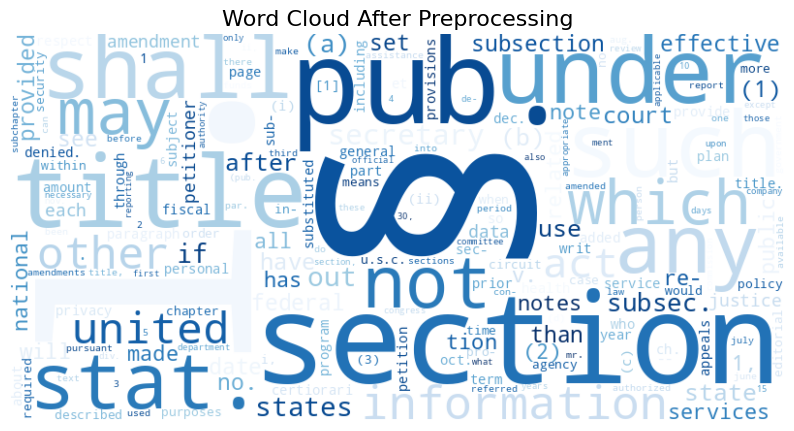

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the `word_counts` dictionary from your preprocessing step
# Make sure it's populated with the preprocessed word frequencies

# Generate the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # Set the background to white
    colormap='Blues'         # Use a colormap to differentiate from raw data
).generate_from_frequencies(word_counts)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud After Preprocessing", fontsize=16)
plt.show()


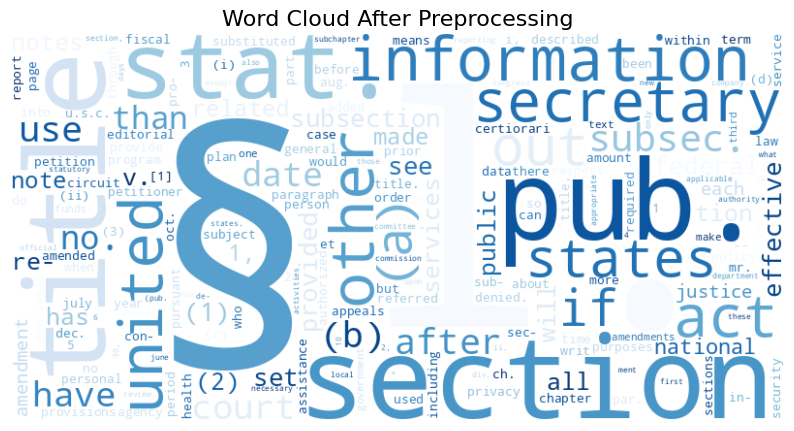

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define custom stopwords (add more words you want to exclude)
custom_stopwords = {"shall", "may", "such", "which", "state", "any", "not", "under"}

# Filter the word frequencies to exclude custom stopwords
filtered_word_frequencies = {word: freq for word, freq in word_counts.items() if word not in custom_stopwords}

# Generate the Word Cloud with filtered data and blue color theme
filtered_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # Set the background to white
    colormap='Blues'           # Use a blue color theme
).generate_from_frequencies(filtered_word_frequencies)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(filtered_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud After Preprocessing", fontsize=16)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Replace these placeholders with your actual data from preprocessing
preprocessed_sentence_lengths = [...]  # List of sentence lengths
preprocessed_word_lengths = [...]  # List of word lengths
preprocessed_special_character_counts = {...}  # Dictionary of special character counts
preprocessed_word_frequencies = {...}  # Dictionary of word frequencies

# 1. Histogram of Sentence Lengths After Preprocessing
plt.figure(figsize=(10, 6))
plt.hist(preprocessed_sentence_lengths, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title("Histogram of Sentence Lengths After Preprocessing")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Boxplot of Word Lengths After Preprocessing
plt.figure(figsize=(8, 5))
plt.boxplot(preprocessed_word_lengths, vert=False, patch_artist=True,
            boxprops=dict(facecolor='orange', color='black'),
            medianprops=dict(color='red'))
plt.title("Boxplot of Word Lengths After Preprocessing")
plt.xlabel("Word Length (characters)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Special Character Frequency After Preprocessing
preprocessed_special_char_df = pd.DataFrame(preprocessed_special_character_counts.items(), columns=["Character", "Frequency"])

plt.figure(figsize=(10, 6))
plt.bar(preprocessed_special_char_df["Character"], preprocessed_special_char_df["Frequency"], color='orange', alpha=0.7, edgecolor='black')
plt.title("Special Character Frequency After Preprocessing")
plt.xlabel("Special Character")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:

pip install reportlab

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import os

# Directory for saving preprocessed PDFs
output_dir = "/content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs"
os.makedirs(output_dir, exist_ok=True)

# Function to save text as a PDF using reportlab
def save_text_to_pdf_reportlab(text, output_path):
    c = canvas.Canvas(output_path, pagesize=letter)
    c.setFont("Helvetica", 10)  # Set font and size
    width, height = letter
    y_position = height - 30  # Start 30 points from the top

    # Add text line by line
    for line in text.split('\n'):
        if y_position < 30:  # If we're at the bottom of the page, add a new page
            c.showPage()
            c.setFont("Helvetica", 10)
            y_position = height - 30
        c.drawString(30, y_position, line)  # Draw the line
        y_position -= 12  # Move down by 12 points for the next line

    c.save()

# Process all PDFs and save preprocessed content
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, filename)
        print(f"Processing {filename}...")

        # Extract text
        raw_text = extract_text_from_pdf(file_path)

        if raw_text.strip():  # Skip empty files
            # Preprocess text
            preprocessed_text = ' '.join(preprocess_text(raw_text))

            # Define the output file path
            output_file = os.path.join(output_dir, f"processed_{filename}")

            # Save preprocessed text to a PDF using reportlab
            save_text_to_pdf_reportlab(preprocessed_text, output_file)

            print(f"Saved preprocessed PDF: {output_file}")

print(f"All preprocessed PDFs have been saved in {output_dir}.")


Processing 911asians.com.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_911asians.com.pdf
Processing 9wows.com.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_9wows.com.pdf
Processing 911metallurgist.com.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_911metallurgist.com.pdf
Processing 99oi.info.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_99oi.info.pdf
Processing 91youa.com.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_91youa.com.pdf
Processing 98online.com.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_98online.com.pdf
Processing 9ddot.com.pdf...
Saved preprocessed PDF: /content/drive/Shareddrives/DATA298B_Final/Data/Processed_PDFs/processed_9ddot

KeyboardInterrupt: 